**Grupo 1**



* Patricia Roxana Rios
* Nicolás Miguel Donato  
* Matías José Rivadeneira












In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#arch = '/content/drive/MyDrive/Colab Notebooks/Crimenes.csv'
arch = '/content/drive/MyDrive/big data/laboratorio_clasificador/Crimenes.csv'
df = pd.read_csv(arch)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Estado            50 non-null     object 
 1   Asesinatos        50 non-null     float64
 2   Asaltos           50 non-null     int64  
 3   Poblacion Urbana  50 non-null     int64  
 4   Violaciones       50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


Normalizar los datos



In [4]:
escala = MinMaxScaler()
columnas = df.loc[:,['Asesinatos', 'Asaltos', 'Poblacion Urbana', 'Violaciones']]
datos_normalizados = escala.fit_transform(columnas)
df_normalizado = pd.DataFrame(datos_normalizados, columns= columnas.columns)
df_normalizado['Estado'] = df['Estado']
df_normalizado


,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,Estado
0,0.746988,0.654110,0.440678,0.359173,Alabama
1,0.554217,0.746575,0.271186,0.961240,Alaska
2,0.439759,0.852740,0.813559,0.612403,Arizona
3,0.481928,0.496575,0.305085,0.315245,Arkansas
4,0.493976,0.791096,1.000000,0.860465,California
5,0.427711,0.544521,0.779661,0.811370,Colorado
6,0.150602,0.222603,0.762712,0.098191,Connecticut
7,0.307229,0.660959,0.677966,0.219638,Delaware
8,0.879518,0.993151,0.813559,0.635659,Florida
9,1.000000,0.568493,0.474576,0.478036,Georgia


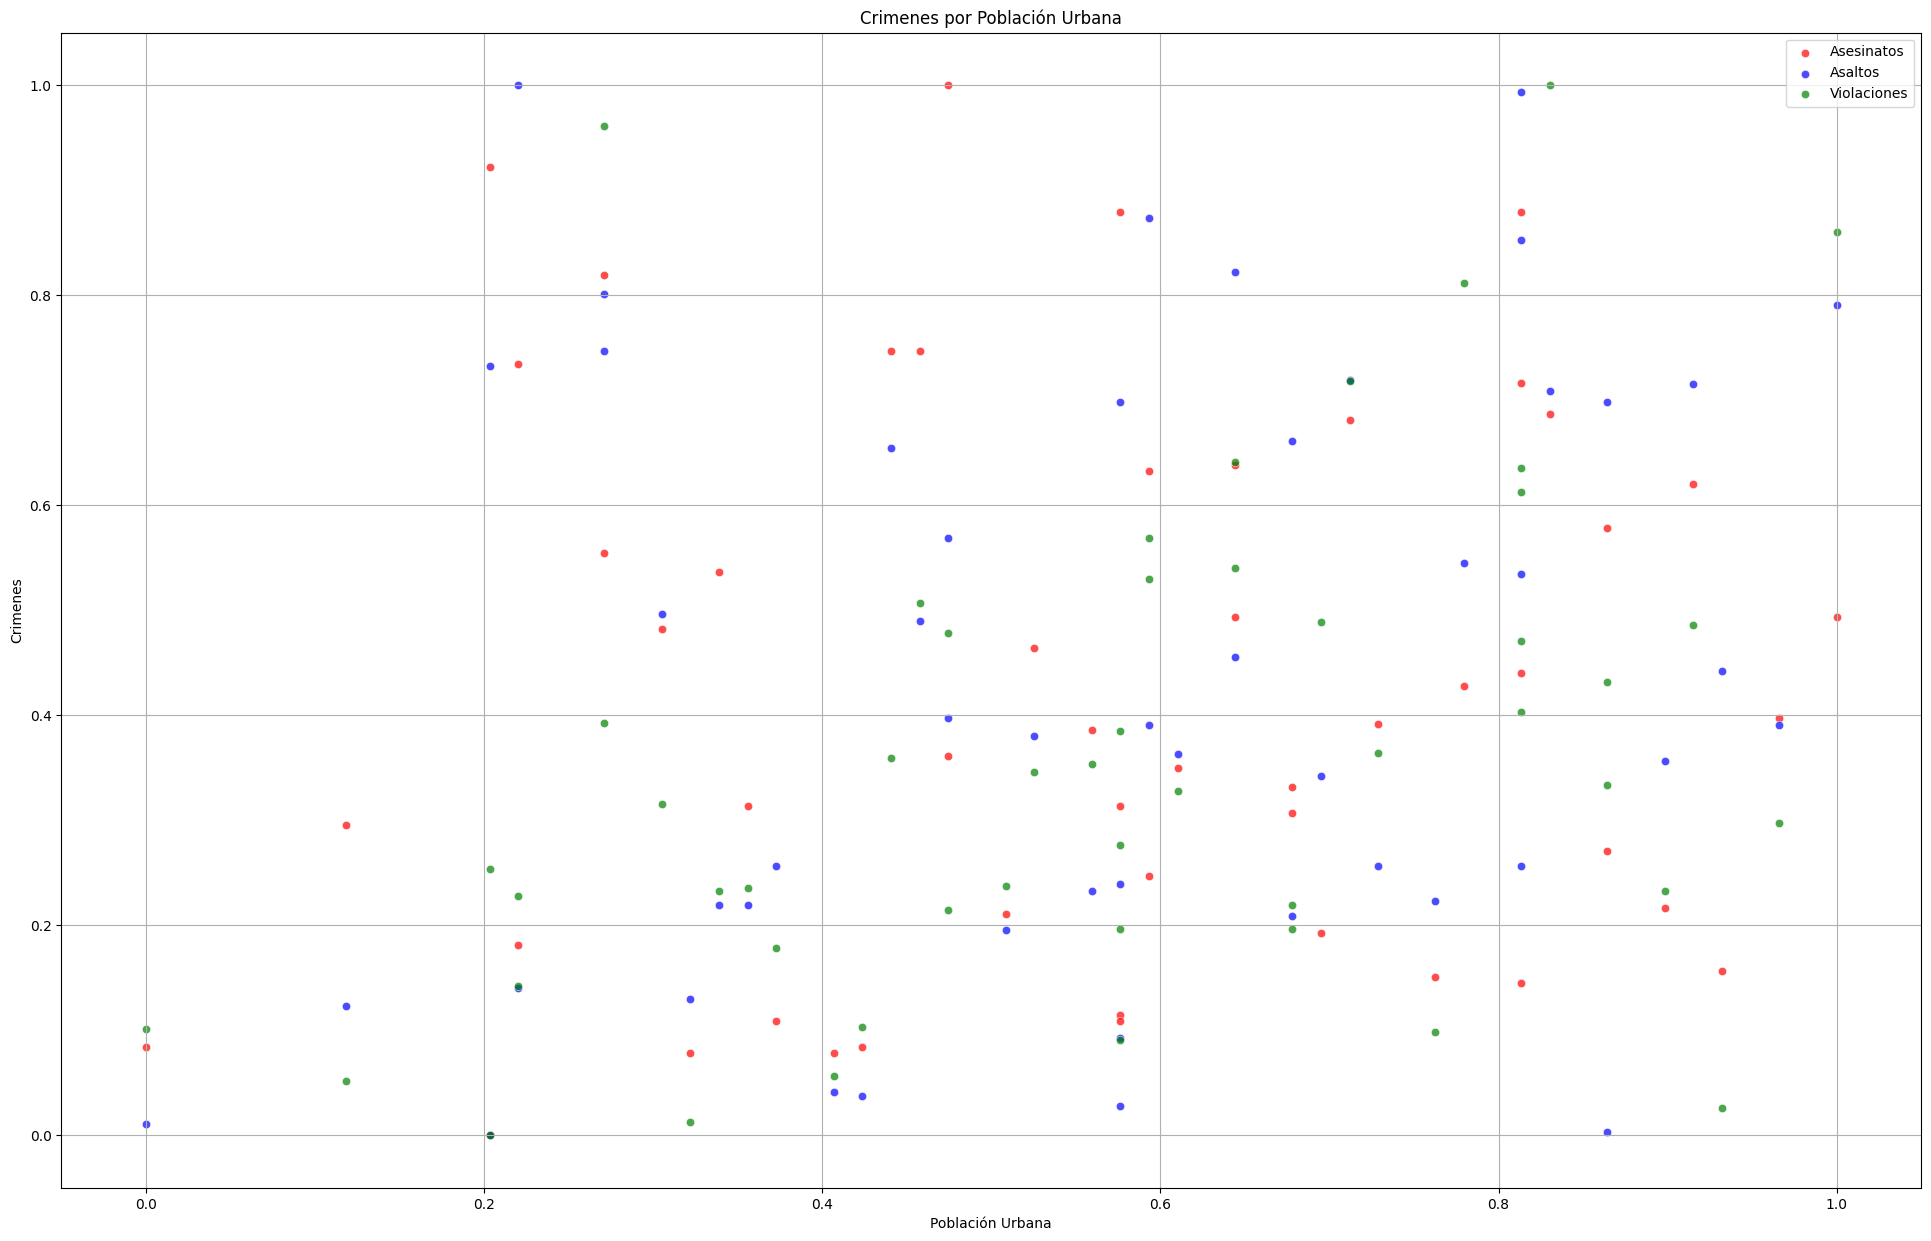

In [5]:
# Crear el gráfico
plt.figure(figsize=(24, 15))

# Graficar asesinatos por población urbana
plt.scatter(df_normalizado['Poblacion Urbana'], df_normalizado['Asesinatos'], c='red', label='Asesinatos', alpha=0.7, edgecolors='w', linewidth=0.5)
plt.scatter(df_normalizado['Poblacion Urbana'], df_normalizado['Asaltos'], c='blue', label='Asaltos', alpha=0.7, edgecolors='w', linewidth=0.5)
plt.scatter(df_normalizado['Poblacion Urbana'], df_normalizado['Violaciones'], c='green', label='Violaciones', alpha=0.7, edgecolors='w', linewidth=0.5)
# Etiquetas para los estados


# Configuración del gráfico
plt.title('Crimenes por Población Urbana')
plt.xlabel('Población Urbana')
plt.ylabel('Crimenes')
plt.legend()
plt.grid(True)
plt.show()


En el grafico se ve una clara distribucion de los datos. No se ven grupos claros dados


Se itera sobre valores de k desde 2 hasta 10. El algoritmo KMeans se ajusta a los datos para diferentes números de clusters se obtiene la inercia del modelo (la suma de las distancias de cada punto al centro de su cluster)La inercia es una medida que se utiliza en el método del codo.

In [6]:
inertia = []

for k in range(2,11):
    kmeans = KMeans( n_clusters = k, random_state= 42)
    kmeans.fit(datos_normalizados)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

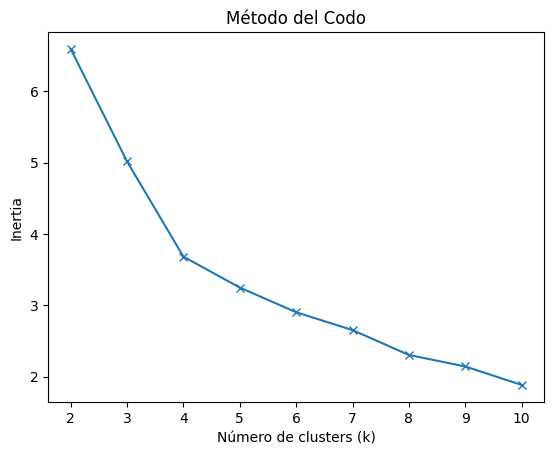

In [7]:
plt.plot(range(2, 11), inertia, marker='x')
plt.title('Método del Codo')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inertia')
plt.show()


Se agrupan los datos en 4 clusters y luego asigna etiquetas en función de la pertenencia de cada punto. Para poder trabajar con esta cantidad de cluster creamos nuevas etiquetas de clasificacion. Te esta manera es mas acertado el analisis y obtenemos mejores resultados

In [8]:
df_4zonas = df.copy()
df_2zonas = df.copy()
# valor optimo 4

kmeans = KMeans(n_clusters=4, random_state=42)
df_4zonas['Cluster'] = kmeans.fit_predict(datos_normalizados)

# Acceder a los centroides
centroides = kmeans.cluster_centers_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Agrupamos los datos en por cluster y obtenemos una tabla general


In [9]:
kmeans_mean_cluster = pd.DataFrame(round(df_4zonas.groupby('Cluster').mean(),1))
kmeans_mean_cluster

<ipython-input-9-f3a61f583538>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  kmeans_mean_cluster = pd.DataFrame(round(df_4zonas.groupby('Cluster').mean(),1))


,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
Cluster,,,,
0,3.6,78.5,52.1,12.2
1,11.0,264.0,76.5,33.6
2,13.9,243.6,53.8,21.4
3,5.9,141.2,73.6,19.3


In [10]:

df_4zonas['Zonas'] = pd.cut(df_4zonas['Cluster'], bins=[-1, 1, 2, 3, 4], labels=['Baja', 'Media', 'Alta', 'Muy Alta'])
df_4zonas

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,Cluster,Zonas
0,Alabama,13.2,236,58,21.2,2,Media
1,Alaska,10.0,263,48,44.5,1,Baja
2,Arizona,8.1,294,80,31.0,1,Baja
3,Arkansas,8.8,190,50,19.5,2,Media
4,California,9.0,276,91,40.6,1,Baja
5,Colorado,7.9,204,78,38.7,1,Baja
6,Connecticut,3.3,110,77,11.1,3,Alta
7,Delaware,5.9,238,72,15.8,3,Alta
8,Florida,15.4,335,80,31.9,1,Baja
9,Georgia,17.4,211,60,25.8,2,Media


Visualizamos los clouster en dos dimenciones graficando componentes principales (PCA)

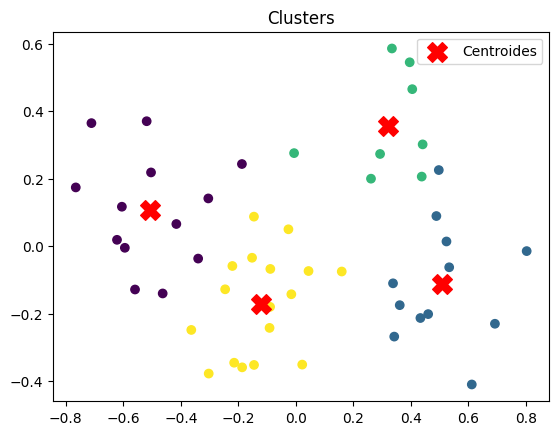

In [11]:
from sklearn.decomposition import PCA

# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
pca_result = pca.fit_transform(datos_normalizados)

# Añadir los resultados de PCA al DataFrame
df_4zonas['PCA1'] = pca_result[:, 0]
df_4zonas['PCA2'] = pca_result[:, 1]

# Graficar los clusters
plt.scatter(df_4zonas['PCA1'], df_4zonas['PCA2'], c=df_4zonas['Cluster'], cmap='viridis')

# Agregar los centroides al gráfico
centroides_pca = pca.transform(centroides)
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1], marker='X', s=200, c='red', label='Centroides')


plt.title('Clusters')
plt.legend()
plt.show()


Trabajamos con 3 cluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


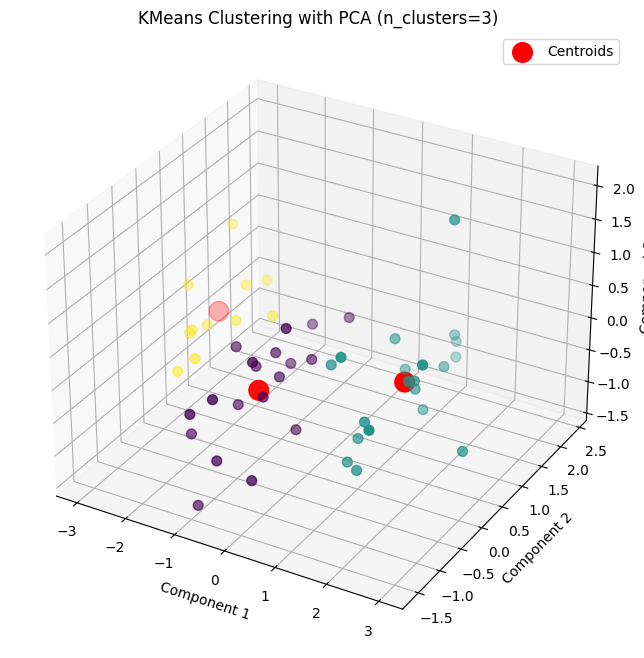

In [12]:
# Aplicar KMeans con n_clusters=3

# Preparación de los datos para la agrupación, excluyendo la columna 'Estado'
df_clustering = df.drop('Estado', axis=1)

# Estandarización de los datos para que sean adecuados para la agrupación KMeans
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)

# Aplicación de PCA para reducir la dimensionalidad a 3 componentes principales
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_scaled)

# Aplicación de KMeans con 3 clústeres a los datos reducidos por PCA
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_pca)

# Creación del gráfico tridimensional para mostrar los resultados de la agrupación
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Los puntos de datos son representados por las tres componentes principales obtenidas por PCA
ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c=clusters, s=50, cmap='viridis')

# Los centroides son representados con círculos rojos
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
            s=200, c='red', marker='o', label="Centroids")

# Configuración del título y las etiquetas de los ejes
plt.title('KMeans Clustering with PCA (n_clusters=3)')
ax.set_xlabel(" Component 1")
ax.set_ylabel(" Component 2")
ax.set_zlabel(" Component 3")
plt.legend()
plt.grid(True)
plt.show()




Se asume que la cantidad de población puede influir en la percepción de peligrosidad o en la incidencia de crímenes, entonces tiene sentido incluir esta característica en el análisis.

PCA (Análisis de Componentes Principales): PCA es una técnica de reducción de dimensionalidad utilizada en análisis de datos y aprendizaje automático. Su objetivo principal es reducir la cantidad de características (dimensiones) en un conjunto de datos mientras conserva la mayor cantidad posible de información relevante. PCA logra esto mediante la transformación de las características originales en un nuevo conjunto de características llamadas "componentes principales". Este código primero aplica PCA para reducir la dimensionalidad a 3 componentes principales y luego utiliza KMeans para agrupar los datos en 3 clústeres. El resultado se visualiza en un gráfico tridimensional donde cada punto representa un estado en función de sus tres componentes principales. Los centroides de los clústeres también se muestran en el gráfico. Esto proporcionará una representación más completa de los datos y su estructura de agrupación en tres dimensiones.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


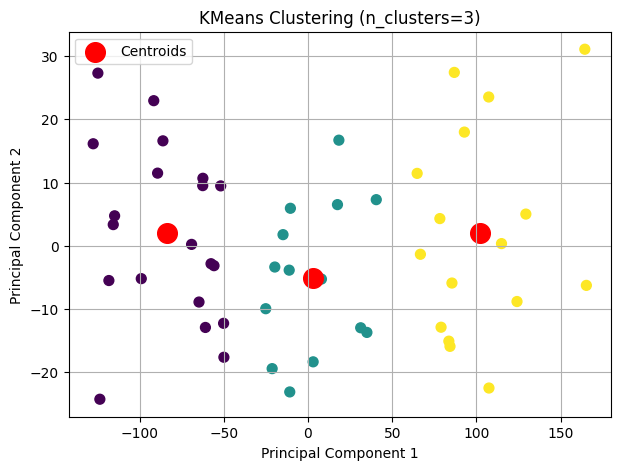

In [13]:
df_3zonas = df.copy()
# Aplicamos KMeans con n_clusters=3 al dataframe df
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(df_3zonas[['Asesinatos', 'Asaltos', 'Poblacion Urbana', 'Violaciones']])

# Añadimos la información de clústeres al dataframe original para visualización
df_3zonas['Cluster'] = clusters

# Utilizamos PCA para reducir la dimensionalidad a dos dimensiones para la visualización
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df[['Asesinatos', 'Asaltos', 'Poblacion Urbana', 'Violaciones']])
kmeans_centers = pca.transform(kmeans.cluster_centers_)

# Graficamos los resultados
plt.figure(figsize=(7, 5))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, s=50, cmap='viridis')
plt.scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], s=200, c='red', marker='o', label="Centroids")
plt.title('KMeans Clustering (n_clusters=3)')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Añadimos las etiquetas de clúster al DataFrame original
df_3zonas['Cluster'] = clusters

# Calculamos los promedios de las variables de interés para cada clúster
cluster_means = df_3zonas.groupby('Cluster')[['Asesinatos', 'Asaltos','Violaciones']].mean()

# Asignamos los niveles de peligrosidad basándonos en los promedios de 'Asesinatos' y 'Asaltos'
# El clúster con el promedio más alto es considerado de 'Alta peligrosidad', el siguiente de 'Media peligrosidad',
# y el más bajo de 'Baja peligrosidad'
sorted_indices = cluster_means.mean(axis=1).sort_values(ascending=False).index
danger_levels = {sorted_indices[0]: 'Alta Peligrosidad',
                 sorted_indices[1]: 'Media Peligrosidad',
                 sorted_indices[2]: 'Baja Peligrosidad'}

# Añadimos una nueva columna al DataFrame con los niveles de peligrosidad
df_3zonas['Peligrosidad'] = df_3zonas['Cluster'].map(danger_levels)


In [15]:
df_3zonas

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,Cluster,Peligrosidad
0,Alabama,13.2,236,58,21.2,2,Alta Peligrosidad
1,Alaska,10.0,263,48,44.5,2,Alta Peligrosidad
2,Arizona,8.1,294,80,31.0,2,Alta Peligrosidad
3,Arkansas,8.8,190,50,19.5,1,Media Peligrosidad
4,California,9.0,276,91,40.6,2,Alta Peligrosidad
5,Colorado,7.9,204,78,38.7,1,Media Peligrosidad
6,Connecticut,3.3,110,77,11.1,0,Baja Peligrosidad
7,Delaware,5.9,238,72,15.8,2,Alta Peligrosidad
8,Florida,15.4,335,80,31.9,2,Alta Peligrosidad
9,Georgia,17.4,211,60,25.8,1,Media Peligrosidad




Los estados han sido agrupados en tres clústeres según sus tasas de asesinatos, asaltos y violaciones. Cada clúster ha sido clasificado según el nivel promedio de criminalidad: alta, media o baja peligrosidad.

La clasificación no parece estar relacionada con una distribución geográfica específica, ya que estados que son geográficamente cercanos pueden tener diferentes niveles de peligrosidad. Por ejemplo, Arizona y California están en el mismo clúster de alta peligrosidad, mientras que el vecino Nevada está en un clúster diferente.

Los clústeres de alta peligrosidad tienen promedios más altos de asesinatos, asaltos y violaciones comparados con los otros clústeres. Esto indica que los estados en este clúster tienen una tasa general de criminalidad más alta.

Posibles Factores Contribuyentes: Aunque este análisis clasifica los estados según la peligrosidad basándose en las tasas de criminalidad, no proporciona información sobre los factores que podrían contribuir a estas tasas. Por ejemplo, la 'Población Urbana' es una variable presente, pero no influye en el nivel de peligrosidad como era esperado, ya que en poblaciones bajas se puede ver altos niveles de peligrosidad.

Estas clasificaciones pueden ser útiles para la asignación de recursos de seguridad pública y el desarrollo de políticas. Los estados clasificados como de alta peligrosidad podrían necesitar más atención y recursos para combatir la criminalidad.


In [ ]:
# para tabular segun lo pedido
kmeans2 = KMeans(n_clusters=2, random_state=42)
df_2zonas['cluster'] = kmeans2.fit_predict(datos_normalizados)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Elegimos trabajar con clusters = 2 para poder tabular segun lo pedido. Alta criminalidad y baja criminalidad.


In [ ]:
df_2zonas['Zonas'] = pd.cut(df_2zonas['cluster'], bins=[-1, 0, 1], labels=['Baja', 'Alta'])
df_2zonas

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,cluster,Zonas
0,Alabama,13.2,236,58,21.2,1,Alta
1,Alaska,10.0,263,48,44.5,1,Alta
2,Arizona,8.1,294,80,31.0,1,Alta
3,Arkansas,8.8,190,50,19.5,0,Baja
4,California,9.0,276,91,40.6,1,Alta
5,Colorado,7.9,204,78,38.7,1,Alta
6,Connecticut,3.3,110,77,11.1,0,Baja
7,Delaware,5.9,238,72,15.8,0,Baja
8,Florida,15.4,335,80,31.9,1,Alta
9,Georgia,17.4,211,60,25.8,1,Alta


In [ ]:
# creamos un link de descarga del dataframe
from IPython.display import HTML
import base64

dataframe = df_4zonas
def crear_link( dataframe, title = "Download CSV file", filename = "data.csv"):
    csv = dataframe.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

crear_link(dataframe)

In [ ]:
%%HTML

<div class='tableauPlaceholder' id='viz1558006161579' style='position: relative'>
<noscript>
<a href='#'>
<img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;US&#47;USCrimeRatesClusters&#47;Dashboard&#47;1_rss.png' style='border: none' /></a>
</noscript>

<object class='tableauViz'  style='display:none;'>
<param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' />
<param name='embed_code_version' value='3' />
<param name='site_root' value='' />
<param name='name' value='USCrimeRatesClusters&#47;Dashboard' />
<param name='tabs' value='no' />
<param name='toolbar' value='yes' />
<param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;US&#47;USCrimeRatesClusters&#47;Dashboard&#47;1.png' /> <param name='animate_transition' value='yes' />
<param name='display_static_image' value='yes' />
<param name='display_spinner' value='yes' />
<param name='display_overlay' value='yes' />
<param name='display_count' value='yes' />
</object>
</div>
<script type='text/javascript'>                    var divElement = document.getElementById('viz1558006161579');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='700px';vizElement.style.height='527px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

En el cluster 2 podemos ver que son las zonas con mayores asaltos, corresponden al sur este del pais. Con el cluster 3 vemos las zonas de mayores asesinatos que son las estados del norte y con un numero alto de asaltos.
Los estados del cluster 4 sobresalen por su bajo numeros en asesinatos, serian los estados centro norte del pais.